In [1]:
#step one : fething the dataset
from sklearn.datasets import fetch_mldata
mnist  = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
# step two : setup features matrix and label vector
x = mnist['data']
y= mnist['target']
x.shape

(70000, 784)

In [3]:
y.shape

(70000,)

5.0

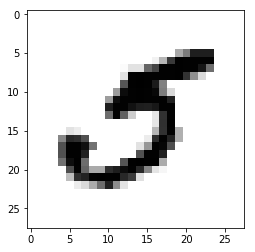

In [51]:
# step3 take a loo on an istance
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

imgpixel = x[36000]
imgframe=imgpixel.reshape(28,28)
plt.imshow(imgframe ,cmap = matplotlib.cm.binary , interpolation = 'nearest')
y[36000] #just to assure that features meets the target in the dataset

In [5]:
# step four :splitting the data into train and test 
import pandas as pd 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=10/70, random_state=42)


In [6]:
# step five : shuffling the train data (make them random!)
import numpy as np
shuffler_tool = np.random.permutation(60000)
xtrain , ytrain = xtrain[shuffler_tool] , ytrain[shuffler_tool]
xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
# Training a binary classifier for identifying one digit
# Step six : creat a binary target victor for number 5
train_target5 = (ytrain==5)
test_traget5 = (ytest==5)
train_target5

array([ True, False, False, ..., False, False, False])

In [8]:
# step7 : lets try with the first model :Stochastic Gradient Descent) SGD : GOOD FOR BINARY and big amont of data
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state=42)
classifier.fit(xtrain,train_target5)
# check a predection for example we know that instance 36000 has a traget with 5
classifier.predict([x[36000]])

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([ True])

In [9]:
# step8: evaluate the performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier , xtrain , train_target5 , cv =3 , scoring ='accuracy')
scores

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

array([0.959  , 0.88095, 0.94865])

In [10]:
# step9: let's build a confusion matrix between true values and predicted
from sklearn.model_selection import cross_val_predict
predict_from_kfolds =cross_val_predict(classifier , xtrain , train_target5 , cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target5 , predict_from_kfolds)

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

array([[51493,  3113],
       [ 1115,  4279]], dtype=int64)

In [11]:
# step 10 : get out all scores 
from sklearn.metrics import precision_score , recall_score ,f1_score
def get_allscores(true , predict):
    precision = precision_score(true , predict)
    recall = recall_score(true , predict)
    f1 = f1_score(true , predict)
    M = print('precision:', precision ,'recall :' , recall , 'f1: ' , f1)
    return M

get_allscores(train_target5 , predict_from_kfolds)  

precision: 0.5788690476190477 recall : 0.7932888394512421 f1:  0.6693258251212263


In [12]:
# lets draw the recall precision curve to decide on our threshold
yscores = cross_val_predict(classifier ,xtrain, train_target5 ,cv = 3 , method ='decision_function')


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

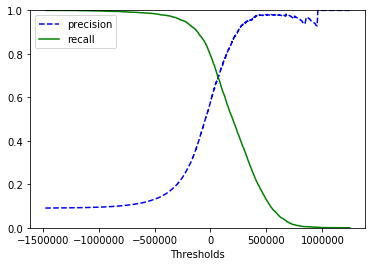

In [13]:
# step11: plotting the curve
from sklearn.metrics import precision_recall_curve
precisions , recalls , thresholds = precision_recall_curve(train_target5 ,yscores)
def plot_prec_recall():
    plt.plot(thresholds , precisions[:-1], 'b--' , label ='precision')
    plt.plot(thresholds , recalls[:-1] , 'g-' , label = 'recall')
    plt.xlabel('Thresholds')
    plt.legend(loc= 'upper left')
    plt.ylim([0 ,1])
plot_prec_recall()

In [14]:
# step12 : selectthe required precision then set the thrshpld for it : let's say 90% precision 
newprediction = (yscores>200000)
get_allscores(train_target5 , newprediction)  

precision: 0.8649693844666452 recall : 0.4975899147200593 f1:  0.6317523831940686


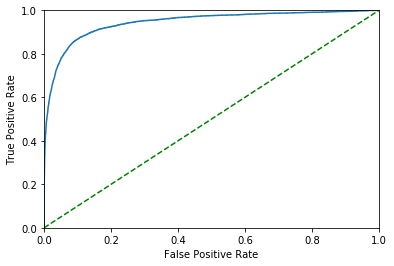

In [15]:
#step13: using ROC curve method for checking True Positive rates and False Positive Rates
from sklearn.metrics import roc_curve
fpr , tpr , thresholds = roc_curve(train_target5 , yscores)
def plot_roc(fpr ,tpr ,  label = None ):
    plt.plot(fpr , tpr  ,  label = label)
    plt.plot([0,1],[0,1],'g--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc(fpr ,tpr)

In [16]:
# step14: get the area under ROC curve ; ROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(train_target5 , yscores)

0.9443075620247658

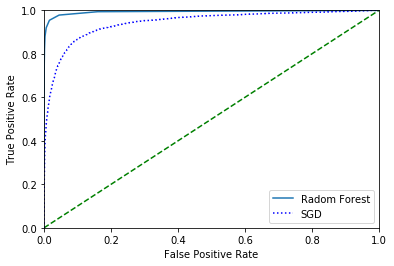

In [17]:
# step15: let's use another model and compare:random forest
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state = 42)
yprobapility = cross_val_predict(classifier2 ,xtrain , train_target5 , cv=3 , method = 'predict_proba')
yscoresrandom = yprobapility[: ,1]
fprrand , tprran , thresholdsrand =roc_curve(train_target5 , yscoresrandom)
plot_roc(fprrand ,tprran ,'Radom Forest')
plt.plot(fpr, tpr , 'b:' , label = 'SGD')
plt.legend(loc = 'lower right')
plt.show()

In [18]:
# get the random forest ROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(train_target5 ,yscoresrandom)#0.992 means better than SGD

0.9933211493109413

In [19]:
# notes to keep in mid
# note1:SGD Classifier is good for big data and bbinary classifier 
# note2: theshold is very important to adjust the precision nd recall
# note3: ther are two tools for binarssten to chec the trades off between recall and precision(pr cuurve and ROC curve)
# note4: precision is how much true positive compared to all your predicted positives but recall is how big enough is our true positive compared
#     to the all real true positives


In [20]:
# Now we will try Multiclassification
#    some important notes 
# 1:Random classifiier and Naive Bayes handle directly Multiple classes
# 2:Support vector machines and Linear classifiers handle directly Binary classifiers.
# 3: Two ways can be used for binary to make it used for multy classes(OVO /OVA)
# 4: Always when using Binary for Multy on scikit Learn it uses OVA excep Support vector M uses OVO.
# 5:OVO Rule --> Number of classes will be ((N-1)/2)*N where N is the number of label Unique Values


In [21]:
# Step1: get the data 
# xtrain ,xtest ytrain and ytest the same like privious example
# step2: get the model to fit
from sklearn.linear_model import SGDClassifier
classifier = SGDClassifier(random_state=42)
classifier.fit(xtrain,ytrain)
classifier.predict([x[36000]])

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [22]:
# step3: tae alook onthe classes of the classifiers
print(classifier.classes_)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [23]:
# Step4: check how many classifier we have and get there scores for the selected  digit (X[36000])
multiscores =classifier.decision_function([x[36000]])
print(multiscores) #As below five has the highst score for that digit
print(np.argmax(multiscores)) #so class 5 is the highst score

[[ -41293.40600774 -447964.98767299 -412990.97853338 -232411.57850541
  -288757.57571762  188793.53526689 -781854.27759798 -148931.96338891
  -674706.07343915 -653215.31155572]]
5


In [24]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
# Note: we can force scikit to use any strategy(OVO or OVA)
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo.fit(xtrain , ytrain)
ovo.predict([x[36000]])


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

array([5.])

In [25]:
# step5: let's use another model and compare:random forest
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(random_state = 42)
classifier2.fit(xtrain , ytrain)
print(classifier2.predict([x[36000]]))
classifier2.classes_

[5.]


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
# Note: for Random Forest We get Probabilties not scores
probabilit_notScores =classifier2.predict_proba([x[36000]])
print(probabilit_notScores)
print(probabilit_notScores.argmax())#Same like SGD or any classifiers you can get the max prob 0.8

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5


In [27]:
# Step6: Lets apply some evaluation for each classifier
# for SGD multiclassifier
#         for accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier , xtrain , ytrain , cv =3 , scoring ='accuracy')
print(scores)
# for Random Forest accuracy
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(classifier2 , xtrain , train_target5 , cv =3 , scoring ='accuracy')
print(scores2)#below ou will see how random is more accurate


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

[0.85112233 0.80935    0.8626794 ]
[0.981   0.98365 0.98375]


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochas

[[5783    2    6   14    8   45   30    5   28    0]
 [   0 6477   17   19   11   78    9   12  128    2]
 [ 129  138 4658  340   99  111  140   87  280    9]
 [  66   69  130 5000   32  556   28   66  129   57]
 [  31   30   19    3 5458   44  111   19   97   84]
 [ 106   25   21  296   99 4486   83   23  218   37]
 [  91   23   12   11   20  270 5393    3   21    0]
 [  71   49   82   42  105   41    5 5627   86  116]
 [ 110  263   78  176  129 1030   71   43 3924   15]
 [ 101   55   18   46 1036  392   15  523  162 3657]]


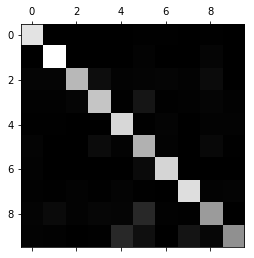

In [28]:
# step6.1: get the confusion matrix
crossvalPredict = cross_val_predict(classifier ,xtrain , ytrain , cv = 3)
conf = confusion_matrix(ytrain , crossvalPredict)
print(conf)
# lets plot
plt.matshow(conf , cmap =plt.cm.gray)
plt.show()

[[5921]
 [6753]
 [5991]
 [6133]
 [5896]
 [5394]
 [5844]
 [6224]
 [5839]
 [6005]]
[[9.76693126e-01 3.37780780e-04 1.01334234e-03 2.36446546e-03
  1.35112312e-03 7.60006756e-03 5.06671170e-03 8.44451951e-04
  4.72893092e-03 0.00000000e+00]
 [0.00000000e+00 9.59129276e-01 2.51739967e-03 2.81356434e-03
  1.62890567e-03 1.15504220e-02 1.33274100e-03 1.77698801e-03
  1.89545387e-02 2.96164668e-04]
 [2.15322984e-02 2.30345518e-02 7.77499583e-01 5.67517944e-02
  1.65247872e-02 1.85277917e-02 2.33683859e-02 1.45217827e-02
  4.67367718e-02 1.50225338e-03]
 [1.07614544e-02 1.12506114e-02 2.11968042e-02 8.15261699e-01
  5.21767487e-03 9.06571009e-02 4.56546551e-03 1.07614544e-02
  2.10337518e-02 9.29398337e-03]
 [5.25780190e-03 5.08819539e-03 3.22252374e-03 5.08819539e-04
  9.25712347e-01 7.46268657e-03 1.88263229e-02 3.22252374e-03
  1.64518318e-02 1.42469471e-02]
 [1.96514646e-02 4.63477938e-03 3.89321468e-03 5.48757879e-02
  1.83537264e-02 8.31664813e-01 1.53874676e-02 4.26399703e-03
  4.041527

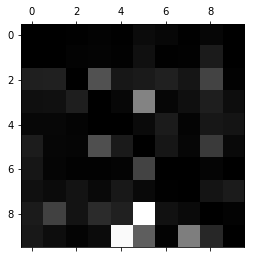

In [29]:
# step6.2: build conf _matrix with error rates
# for each raw of the conf matric we sum the all values  to know the all real valuesthen devide the prediction with all real vlaues
each_real_sum = conf.sum(axis=1 , keepdims=True)
print(each_real_sum)
# normalization the conf_matrix
norm_conf = conf/each_real_sum
print(norm_conf)
np.fill_diagonal(norm_conf , 0)
plt.matshow(norm_conf , cmap = plt.cm.gray)

In [30]:
def digits_plt(instances ,number_perraw = 10,**options):
    size = 28
    num_raws = (len(instances)-1)//number_perraw + 1
    images = [instance.reshape(size,size) for instance in instances]
    empty_place  = []  #empt place for all images per raw 
    n_empty = num_raws * number_perraw - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for raw in range(num_raws):
        all_images_per_raw = images[raw*number_perraw : (raw+1) * number_perraw]
        empty_place.append(np.concatenate(all_images_per_raw,axis = 1))
    Big_image = np.concatenate(empty_place , axis = 0)
    plt.imshow(Big_image , cmap = matplotlib.cm.binary ,**options)
    plt.axis("off")


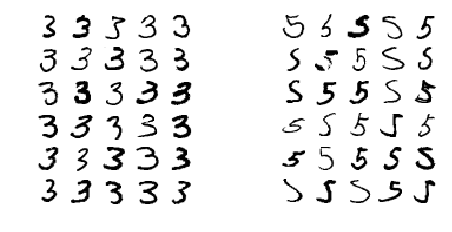

In [31]:
# showing comparison between good prediction and wron prediction 
#      to check the possibilt for adding more feature to correct the wrong selection
classA ,classB = 3,5
x_aa = xtrain[(crossvalPredict== classA) & (ytrain == classA)]
x_BA = xtrain[(crossvalPredict == classA) & (ytrain ==classB)]
plt.figure(figsize=(8,8))
plt.subplot(221);digits_plt(x_aa[:30],number_perraw = 5)
plt.subplot(222);digits_plt(x_BA[:30],number_perraw = 5)



In [32]:
# Last Part: what to do if we have more than one label so we need multilabel classifiers
# model selected is Kneighbours
# step1: creat MltuLael from a defined onelabel(Ytrain)
from sklearn.neighbors import KNeighborsClassifier
LargeLabel = (ytrain>=7)
OddLabel = (ytrain % 2==1)
multiLabbel=np.c_[LargeLabel , OddLabel]
multiLabbel.shape

(60000, 2)

In [33]:
# step 2 : get the model in 
# model selected is Kneighbours
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier()
classifier3.fit(xtrain , multiLabbel)
classifier3.predict([x[36000]])#do not forget that x[36000] is 5 so it is not large and odd as pedicted below

array([[False,  True]])

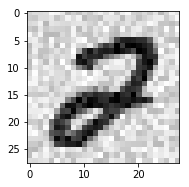

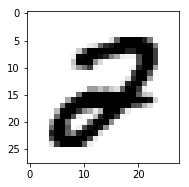

(10000, 784)

In [72]:
# Buiding a cleaner calssifier to predict the digit without noise
noise = np.random.randint(0, 100, (len(xtrain), 784))
train_withnoise = xtrain + noise
noise2 = np.random.randint(0, 100, (len(xtest), 784))
test_withnoise = xtest + noise2
def plot_adigit(data):
    image = data.reshape(28,28)
    plt.imshow(image , cmap = matplotlib.cm.binary,interpolation = 'nearest')
    plt.show()
plt.subplot(121);plot_adigit(test_withnoise[5500])
plt.subplot(122);plot_adigit(xtest[5500])
test_withnoise.shape

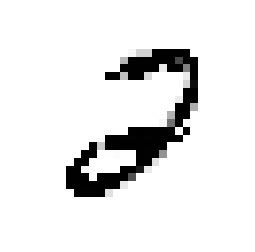

In [66]:
# building the classifier 
train = train_withnoise
target = xtrain

# we will use kneighbour
classifier3.fit(train , target)
cleaned_digit=classifier3.predict([test_withnoise[5500]])
plot_adigit(cleaned_digit)


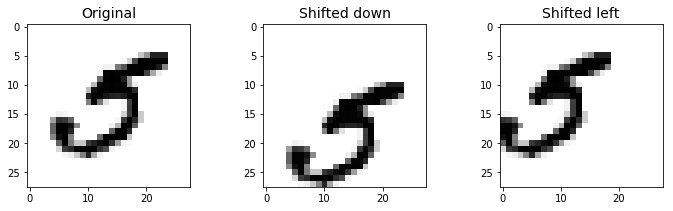

In [80]:
# Let's make aumnatiation using shift
from scipy.ndimage.interpolation import shift
image = x[36000].reshape((28,28))
def shift_image(instanse , dy , dx):
    image = instanse.reshape((28,28))
    shifting_action = shift(image, [dy, dx], cval=0, mode="constant")
    return shifting_action.reshape([-1])

down = shift_image(image , 5 ,0)
left = shift_image(image , 0 , -5)
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(down.reshape((28,28)), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(left.reshape((28,28)),interpolation="nearest", cmap="Greys")